# Comparisons to other papers

In [1]:
import cogsworth
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import gala.dynamics as gd
import seaborn as sns

from importlib import reload

In [2]:
import sys
sys.path.append("../src")
import plotting

In [3]:
import h5py as h5

In [4]:
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_columns = 999

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Grab the fiducial model

In [5]:
p = cogsworth.pop.load("/mnt/home/twagg/ceph/pops/feedback-variations/fiducial.h5")

In [6]:
plotting.set_sn_subpop_masks(p);

16588 283627 182557 376861


In [7]:
f = np.load("/mnt/home/twagg/ceph/pops/feedback-variations/sn_positions-fiducial.npz")
p.primary_sn_distances, p.secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

In [8]:
p.primary_sn_locs = f["arr_2"] * u.kpc
p.secondary_sn_locs = f["arr_3"] * u.kpc

In [9]:
sn_rows_1 = p.bpp[p.bpp["evol_type"] == 15]
sn_rows_2 = p.bpp[p.bpp["evol_type"] == 16]

## Timing

### De Donder & Van Beveren 2003

In [10]:
dd03_b = pd.read_csv("../data/vanbeveren_binaries.txt", delimiter="\t", names=["logT", "logRate"], skiprows=2)
dd03_s = pd.read_csv("../data/vanbeveren_singles.txt", delimiter="\t", names=["logT", "logRate"], skiprows=2)

def get_late_fraction(cutoff=50, binfrac=0.7):

    late, all = 0, 0
    for file, weight in zip([dd03_b, dd03_s], [binfrac, 1 - binfrac]):
        file["rate"] = 10**file["logRate"]
    
        late += weight * file["rate"][file["logT"] >= np.log10(cutoff)].sum()
        all += weight * file["rate"].sum()
    return late / all

In [11]:
get_late_fraction()

0.31159674459004116

In [12]:
get_late_fraction(44, 1.0)

0.5222150733640845

## Distances
### Eldridge+2011

In [13]:
# digitized plot of Figure 9
probs = {
    "II": [0.41639029104503383, 0.00010826367338740541, 0.00013851544972633804, 0.0001950431923798783, 0.0002861536478194055, 0.0004314777276451547, 0.0006506051237596725, 0.0009810170953028848, 0.0014792298832740345, 0.002054579492124939, 0.0028537125548851257, 0.003963670121853711, 0.005211989920804705, 0.006577694846602895, 0.007338987490665485, 0.008889357908933339, 0.009918199006663138, 0.011373283115271825, 0.01268961003167922, 0.01377590360248891, 0.012864519780409405, 0.01268961003167922, 0.013221605218338248, 0.012346892571848884, 0.009783348291228488, 0.008889357908933339, 0.008649276601906035, 0.008301257322528793, 0.006400046292885399, 0.005211989920804705, 0.003909778911229706, 0.0025229142922023103, 0.001419710394916261, 0.0011404464845440234, 0.0008555069527010601, 0.0004748708436205711, 0.00020602124604317737, 0.00008696768450848144, 0.000017770626327992198],
    "Ib": [0.08166002574084141, 0.0000834683825107768, 0.00010390748878039275, 0.00014236027649560184, 0.00020602124604317737, 0.0002861536478194055, 0.00032813482053863584, 0.000366112657906065, 0.0004374250862114677, 0.0004495668630626136, 0.0004748708436205711, 0.0005298316906283713, 0.0006330337614553244, 0.0008324016587665002, 0.0008672990019256072, 0.0008438752316039594, 0.0009161151378239617, 0.0010221449448923091, 0.0010796766224647446, 0.0011096456229509864, 0.0011404464845440234, 0.0011561660541410258, 0.0012212411425415713, 0.0010505170164117955, 0.0008210840839589932, 0.0007880462815669912, 0.0007160355777105231, 0.0006330337614553244, 0.0005911536245388412, 0.000552044186398535, 0.00042561123109391825, 0.00026000527801858976, 0.00013113451174301443, 0.00006092282364683401, 0.00001955779354381783],
    "Ic": [0.20715247705199857, 0.0027388882715823986, 0.002592943797404667, 0.002701649550855951, 0.0027388882715823986, 0.0028930472660919347, 0.002932924155067512, 0.0030558831372140605, 0.0030980045066134783, 0.003183997012733625, 0.0030980045066134783, 0.0028930472660919347, 0.002932924155067512, 0.0030980045066134783, 0.0032278842650656147, 0.003409566518357449, 0.003601474801596651, 0.0038566204211634724, 0.003963670121853711, 0.003963670121853711, 0.0038041846893734216, 0.0033174818937411793, 0.002776640279578431, 0.002488612016450917, 0.002170222000047652, 0.0016731828356228078, 0.0012212411425415713, 0.0009161151378239617, 0.0007259051956630487, 0.00046204566389740863, 0.00023303424068888166, 0.0001207939503447795, 0.000055355770652169136, 0.000012112512686851955],
}

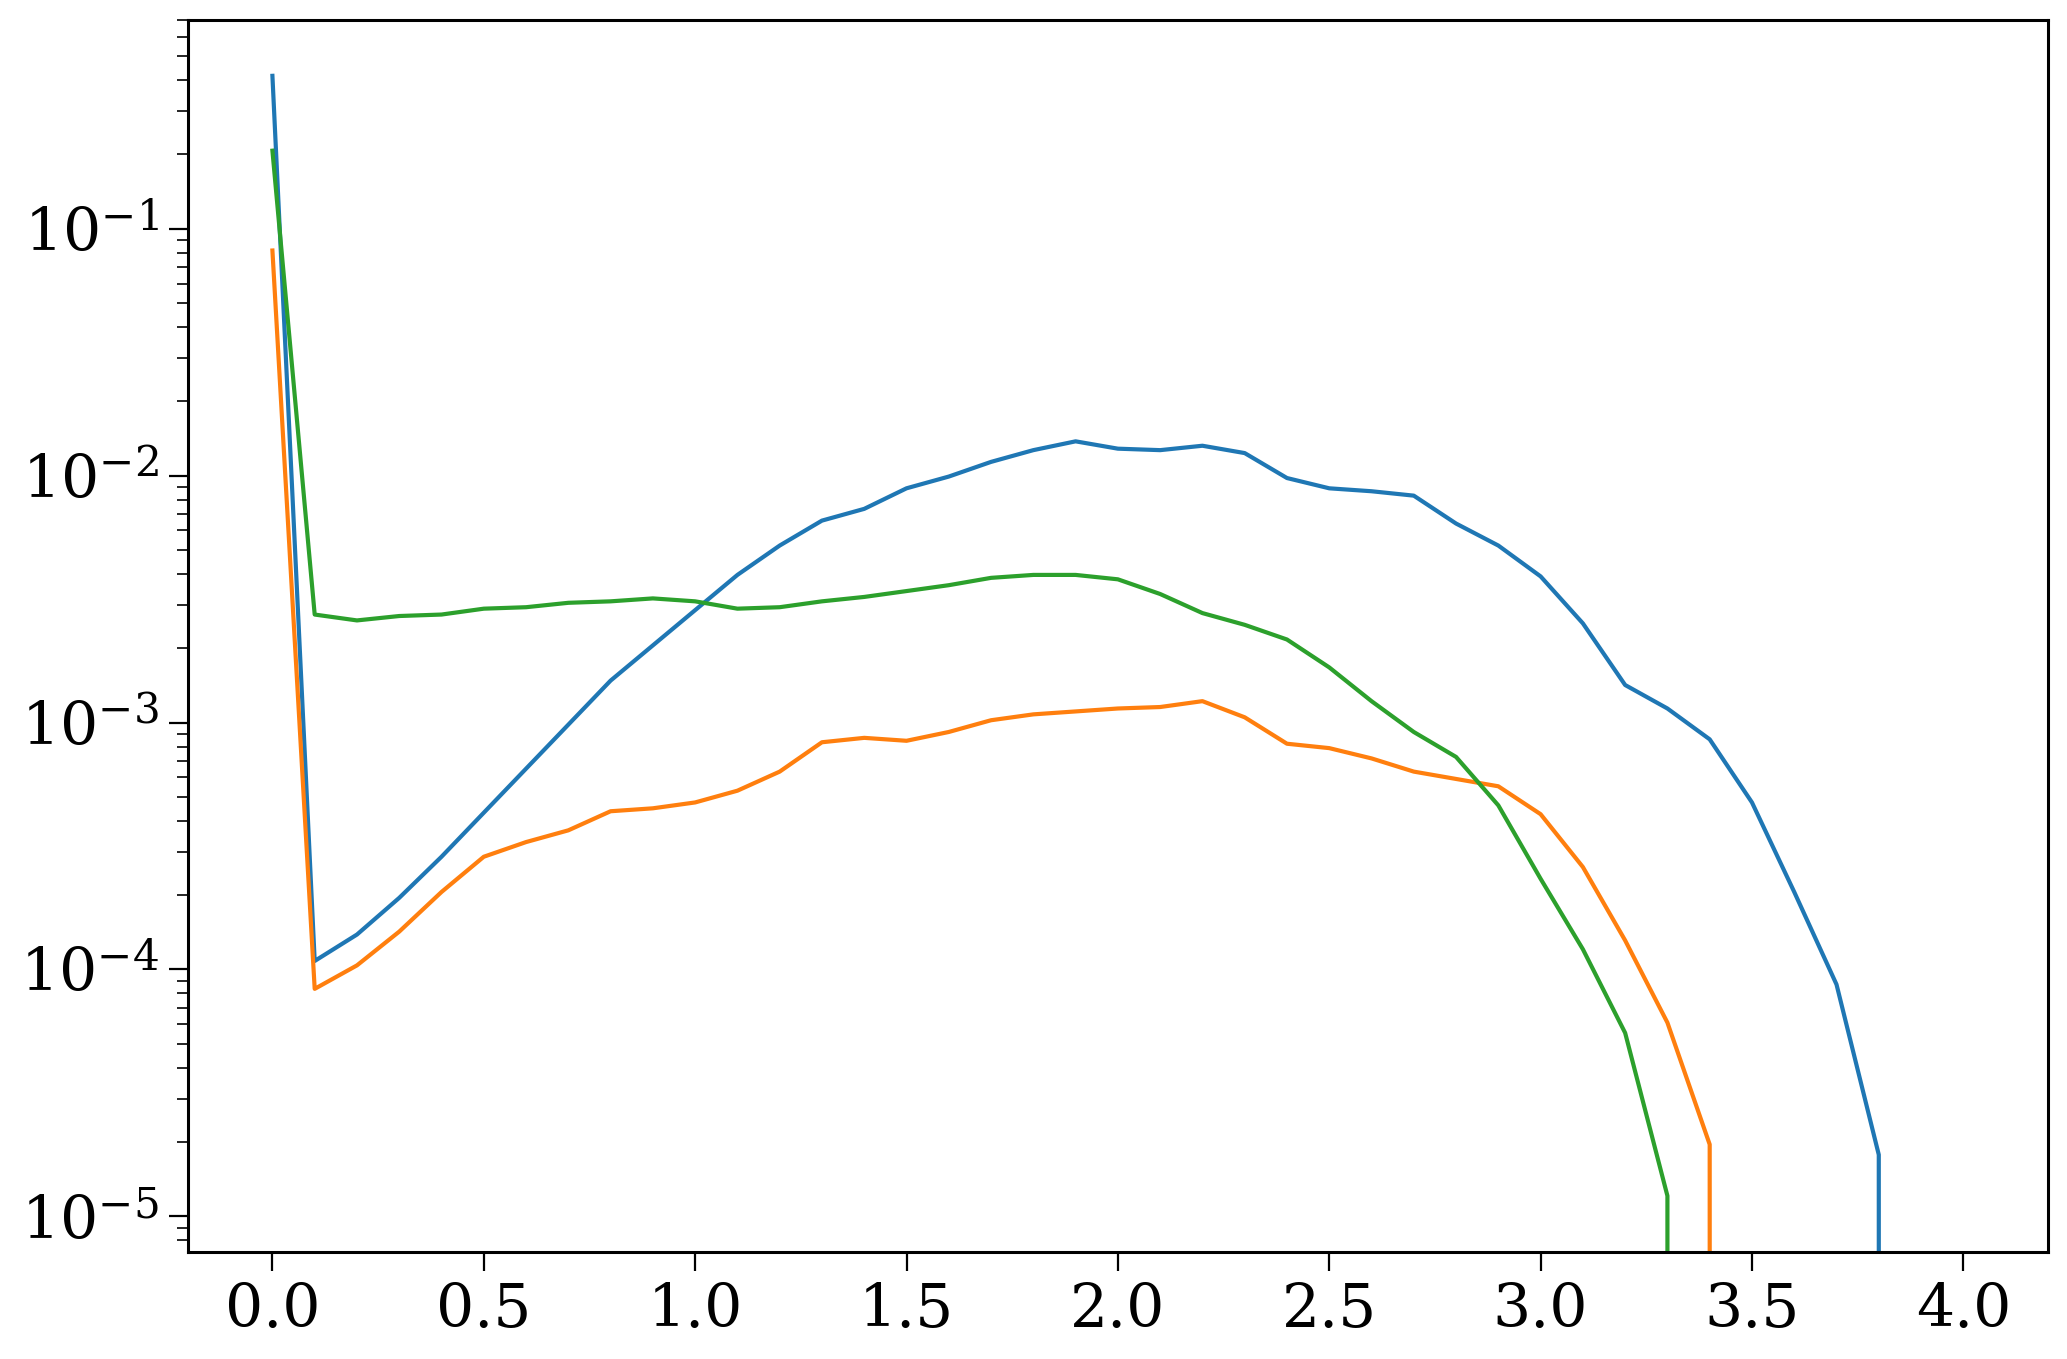

In [14]:
x = np.arange(0, 4.1, 0.1)
total = np.zeros(len(x))
for prob in probs:
    y = probs[prob]
    y = np.asarray(y + [0] * (len(x) - len(y)))
    total += y
    plt.plot(x, y)
plt.yscale("log")

In [19]:
# confirm we didn't mess up
sum(total)

1.0033490439191488

In [24]:
"Fraction beyond 100pc", sum(total[x >= np.log10(100)]).round(2)

('Fraction beyond 100pc', 0.14)

In [21]:
"Fraction beyond 500pc", sum(total[x >= np.log10(500)]).round(2)

('Fraction beyond 500pc', 0.04)

In [25]:
"Disruption fraction", total[0] / sum(total)

('Disruption fraction', 0.7028489219298044)

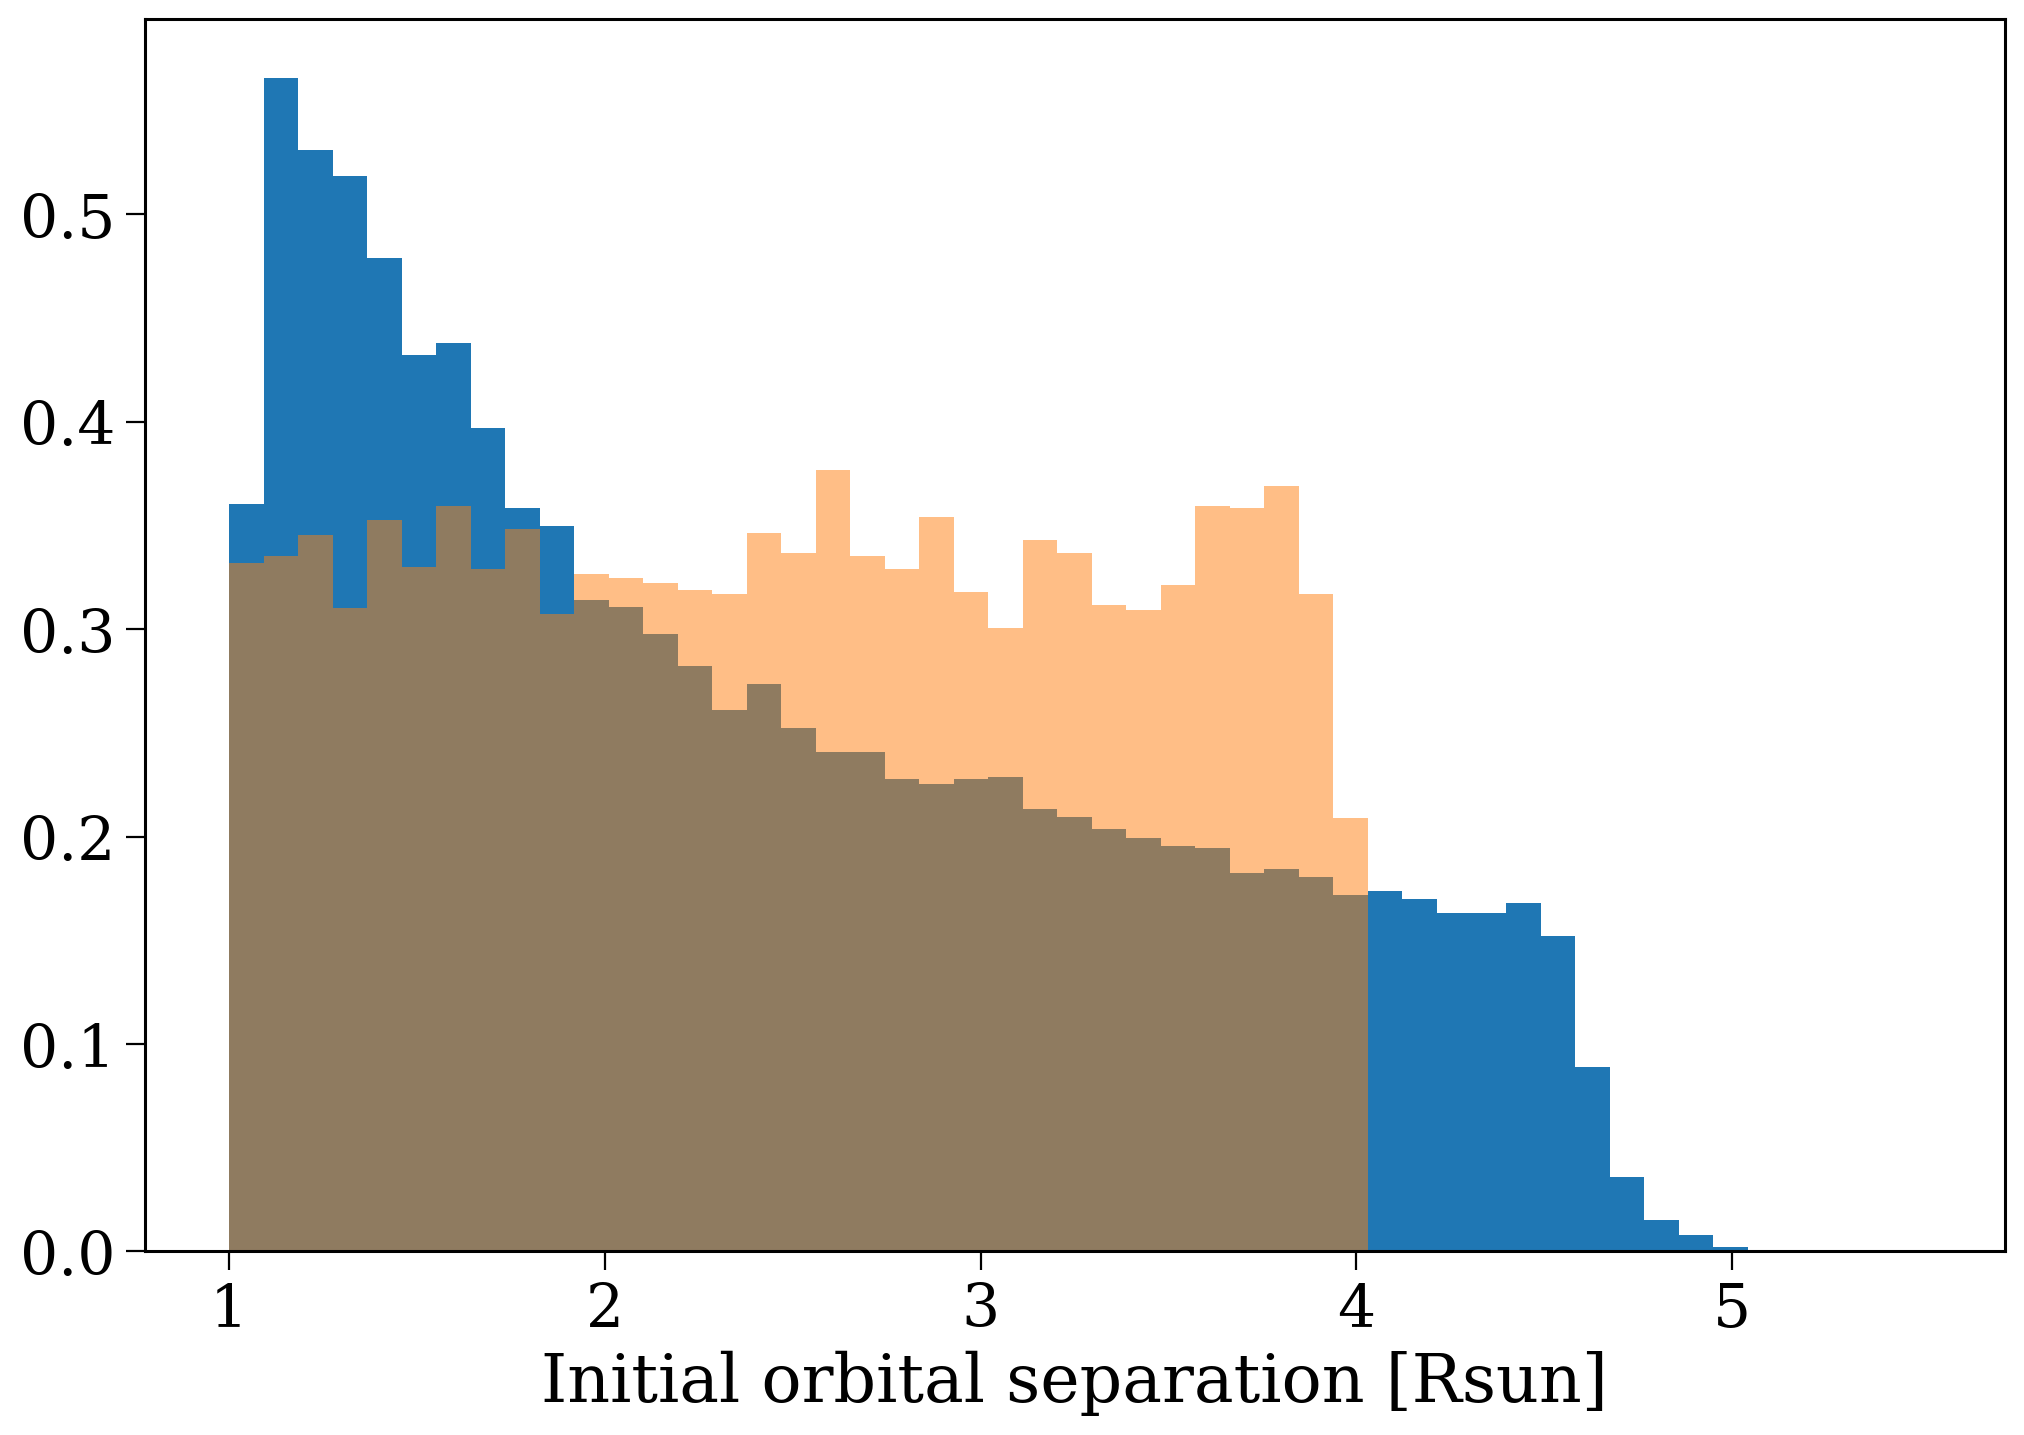

In [116]:
bins = np.linspace(1, 5.5, 50)
plt.hist(np.log10(p.bpp.drop_duplicates(subset="bin_num", keep="first")["sep"]), bins=bins, density=True)
plt.hist(np.random.uniform(1, 4, 10000), bins=bins, density=True, alpha=0.5)
plt.xlabel("Initial orbital separation [Rsun]")
plt.show()

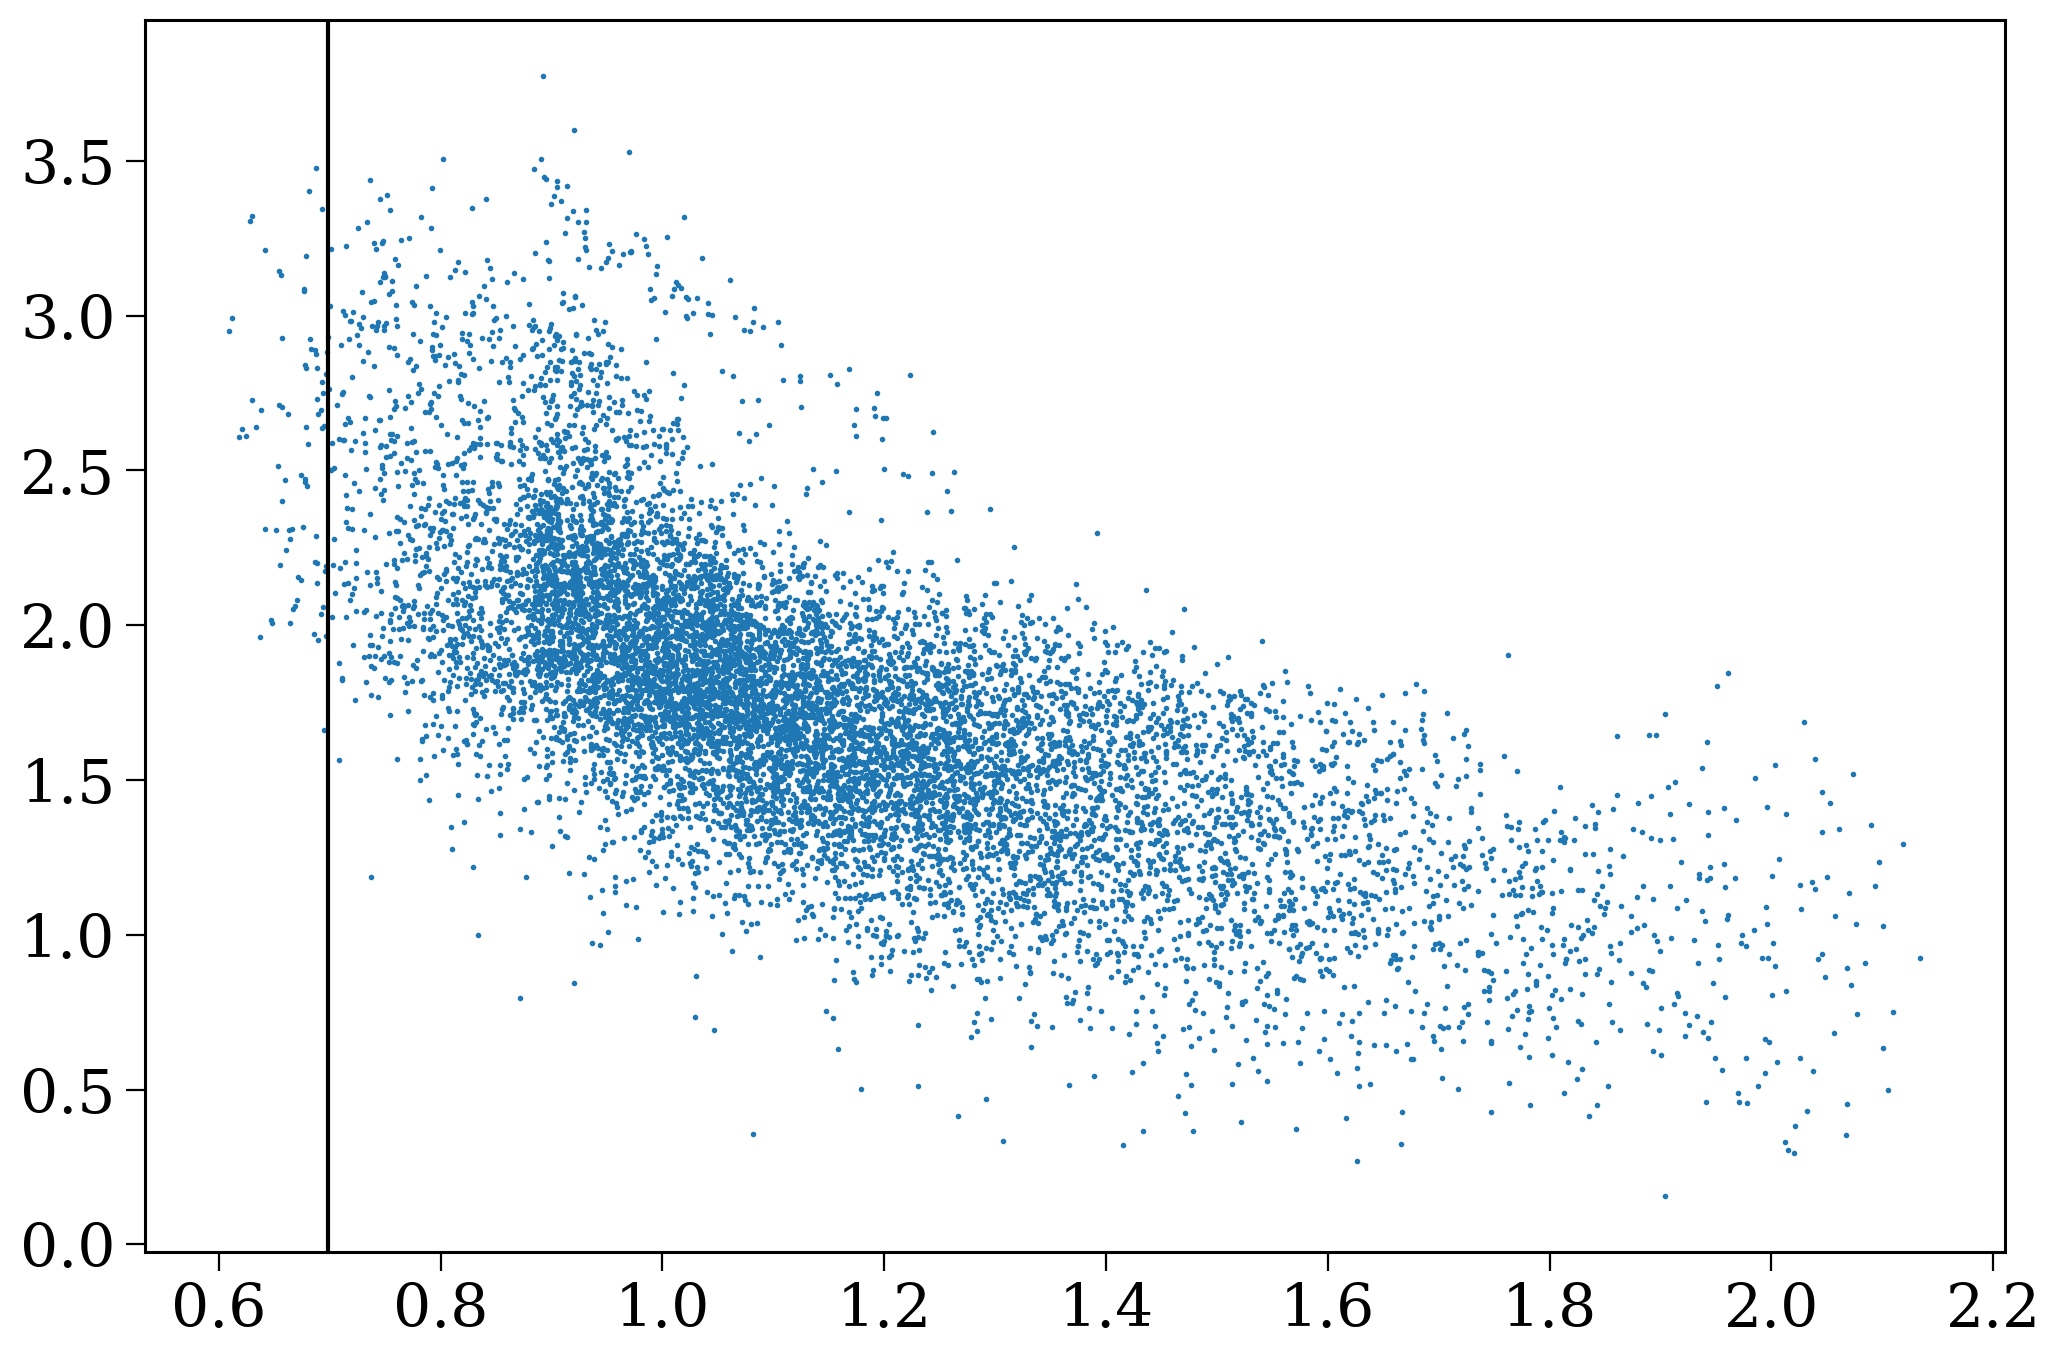

In [571]:
plt.scatter(np.log10(p.initC.loc[p.sn_2[p.sn_2].index]["mass_2"]),
            np.log10(p.secondary_sn_distances[p.sn_2].to(u.pc).value), s=1)
plt.axvline(np.log10(5), color="black")

In [117]:
close_nums = p.bin_nums[p.bpp.drop_duplicates(subset="bin_num", keep="first")["sep"] <= 1e4]
massive_nums = p.bin_nums[p.bpp.drop_duplicates(subset="bin_num", keep="first")["mass_2"] / p.bpp.drop_duplicates(subset="bin_num", keep="first")["mass_1"] >= 0.3]
closer_first_co_rows = first_co_rows[first_co_rows["bin_num"].isin(np.intersect1d(close_nums, massive_nums))]
# len(closer_first_co_rows)

In [118]:
first_co_rows = p.bpp[p.bpp["kstar_1"].isin([13, 14]) | p.bpp["kstar_2"].isin([13, 14])].drop_duplicates(subset="bin_num", keep="first")
(first_co_rows["sep"] == -1).sum() / ((first_co_rows["sep"] == -1) | (first_co_rows["sep"] > 0)).sum()

0.8505182465990067

In [119]:
(closer_first_co_rows["sep"] == -1).sum() / ((closer_first_co_rows["sep"] == -1) | (closer_first_co_rows["sep"] > 0)).sum()

0.8093855450051008

## Renzo+19

In [10]:
from scipy.stats import maxwell

In [11]:
sn_1_rows = p.bpp[p.bpp["evol_type"] == 15]
sn_1_kicks = p.kick_info[p.kick_info["star"] == 1]

In [12]:
mt_nums = p.bpp[p.bpp["evol_type"] == 3]["bin_num"].unique()

In [14]:
ms_ejections = (sn_1_rows["kstar_2"] == 1) & (sn_1_kicks["disrupted"] == 1)
ms_ejection_rows = sn_1_rows[ms_ejections]
ms_ejection_kicks = sn_1_kicks[ms_ejections]

In [15]:
ejection_had_mt = ms_ejection_rows["bin_num"].isin(mt_nums)

In [16]:
from matplotlib.colors import ColorConverter

In [17]:
f"{(1 - (ejection_vels < 60).sum() / len(ejection_vels)) * 100:1.1f}% above 60km/s"

NameError: name 'ejection_vels' is not defined

In [18]:
ms_ejection_distances = p.secondary_sn_distances[p.sn_2][np.isin(p.sn_2[p.sn_2].index, ms_ejection_rows["bin_num"])]

In [19]:
ms_ejection_distances.mean().to(u.pc)

<Quantity 122.6787339 pc>

In [20]:
(ms_ejection_distances > 100 * u.pc).sum() / len(ms_ejections)

0.11380631719930057

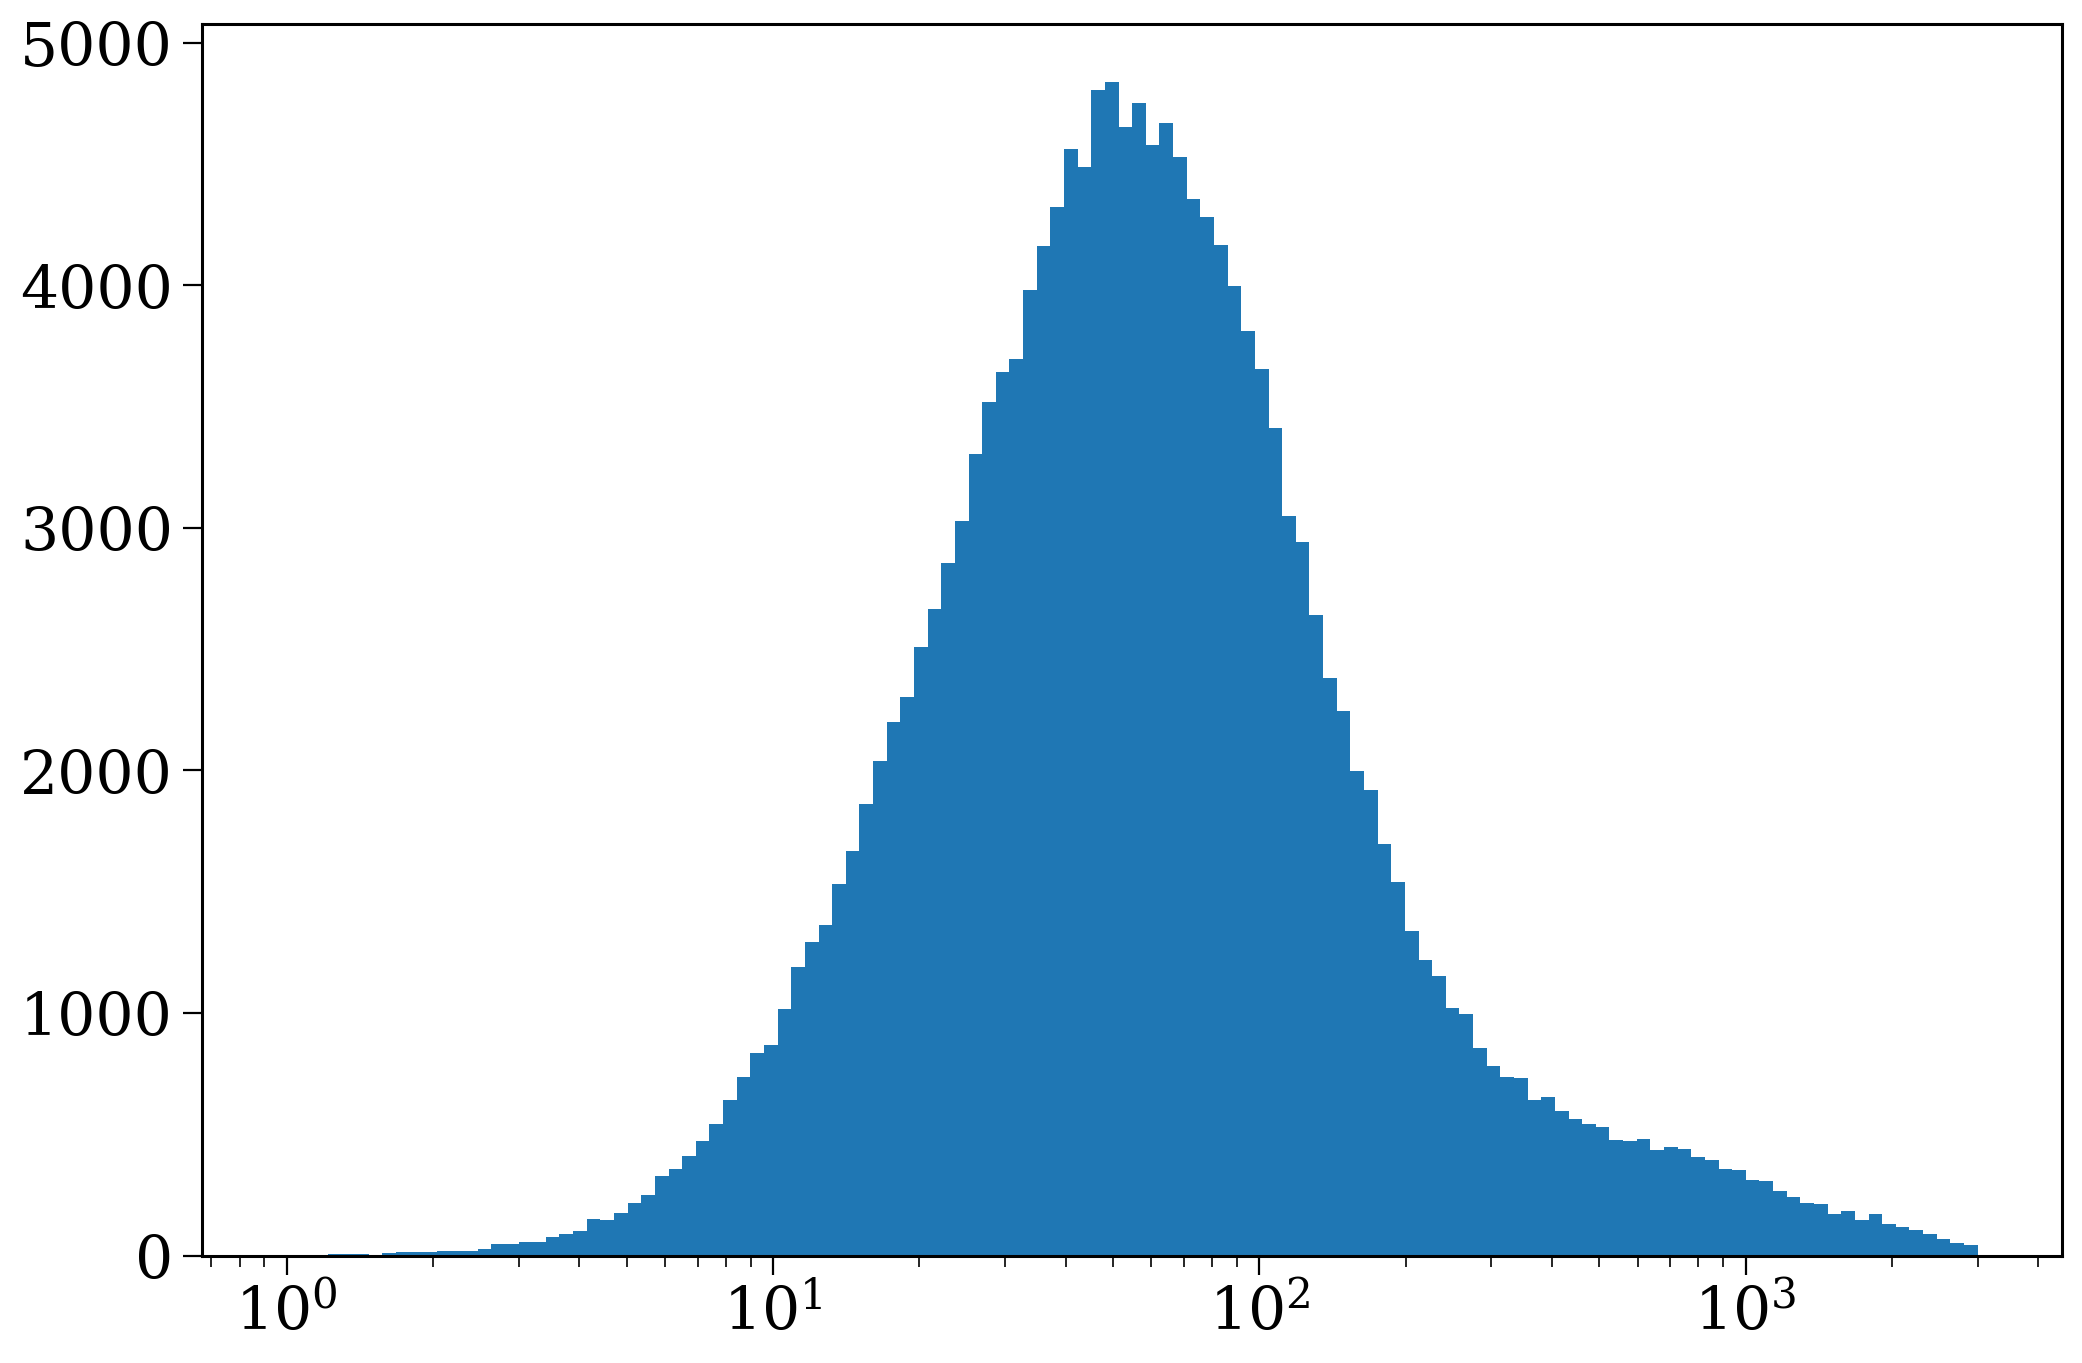

In [22]:
plt.hist(ms_ejection_distances.to(u.pc).value, bins=np.geomspace(1, 3e3, 125))
plt.xscale("log")
plt.show()

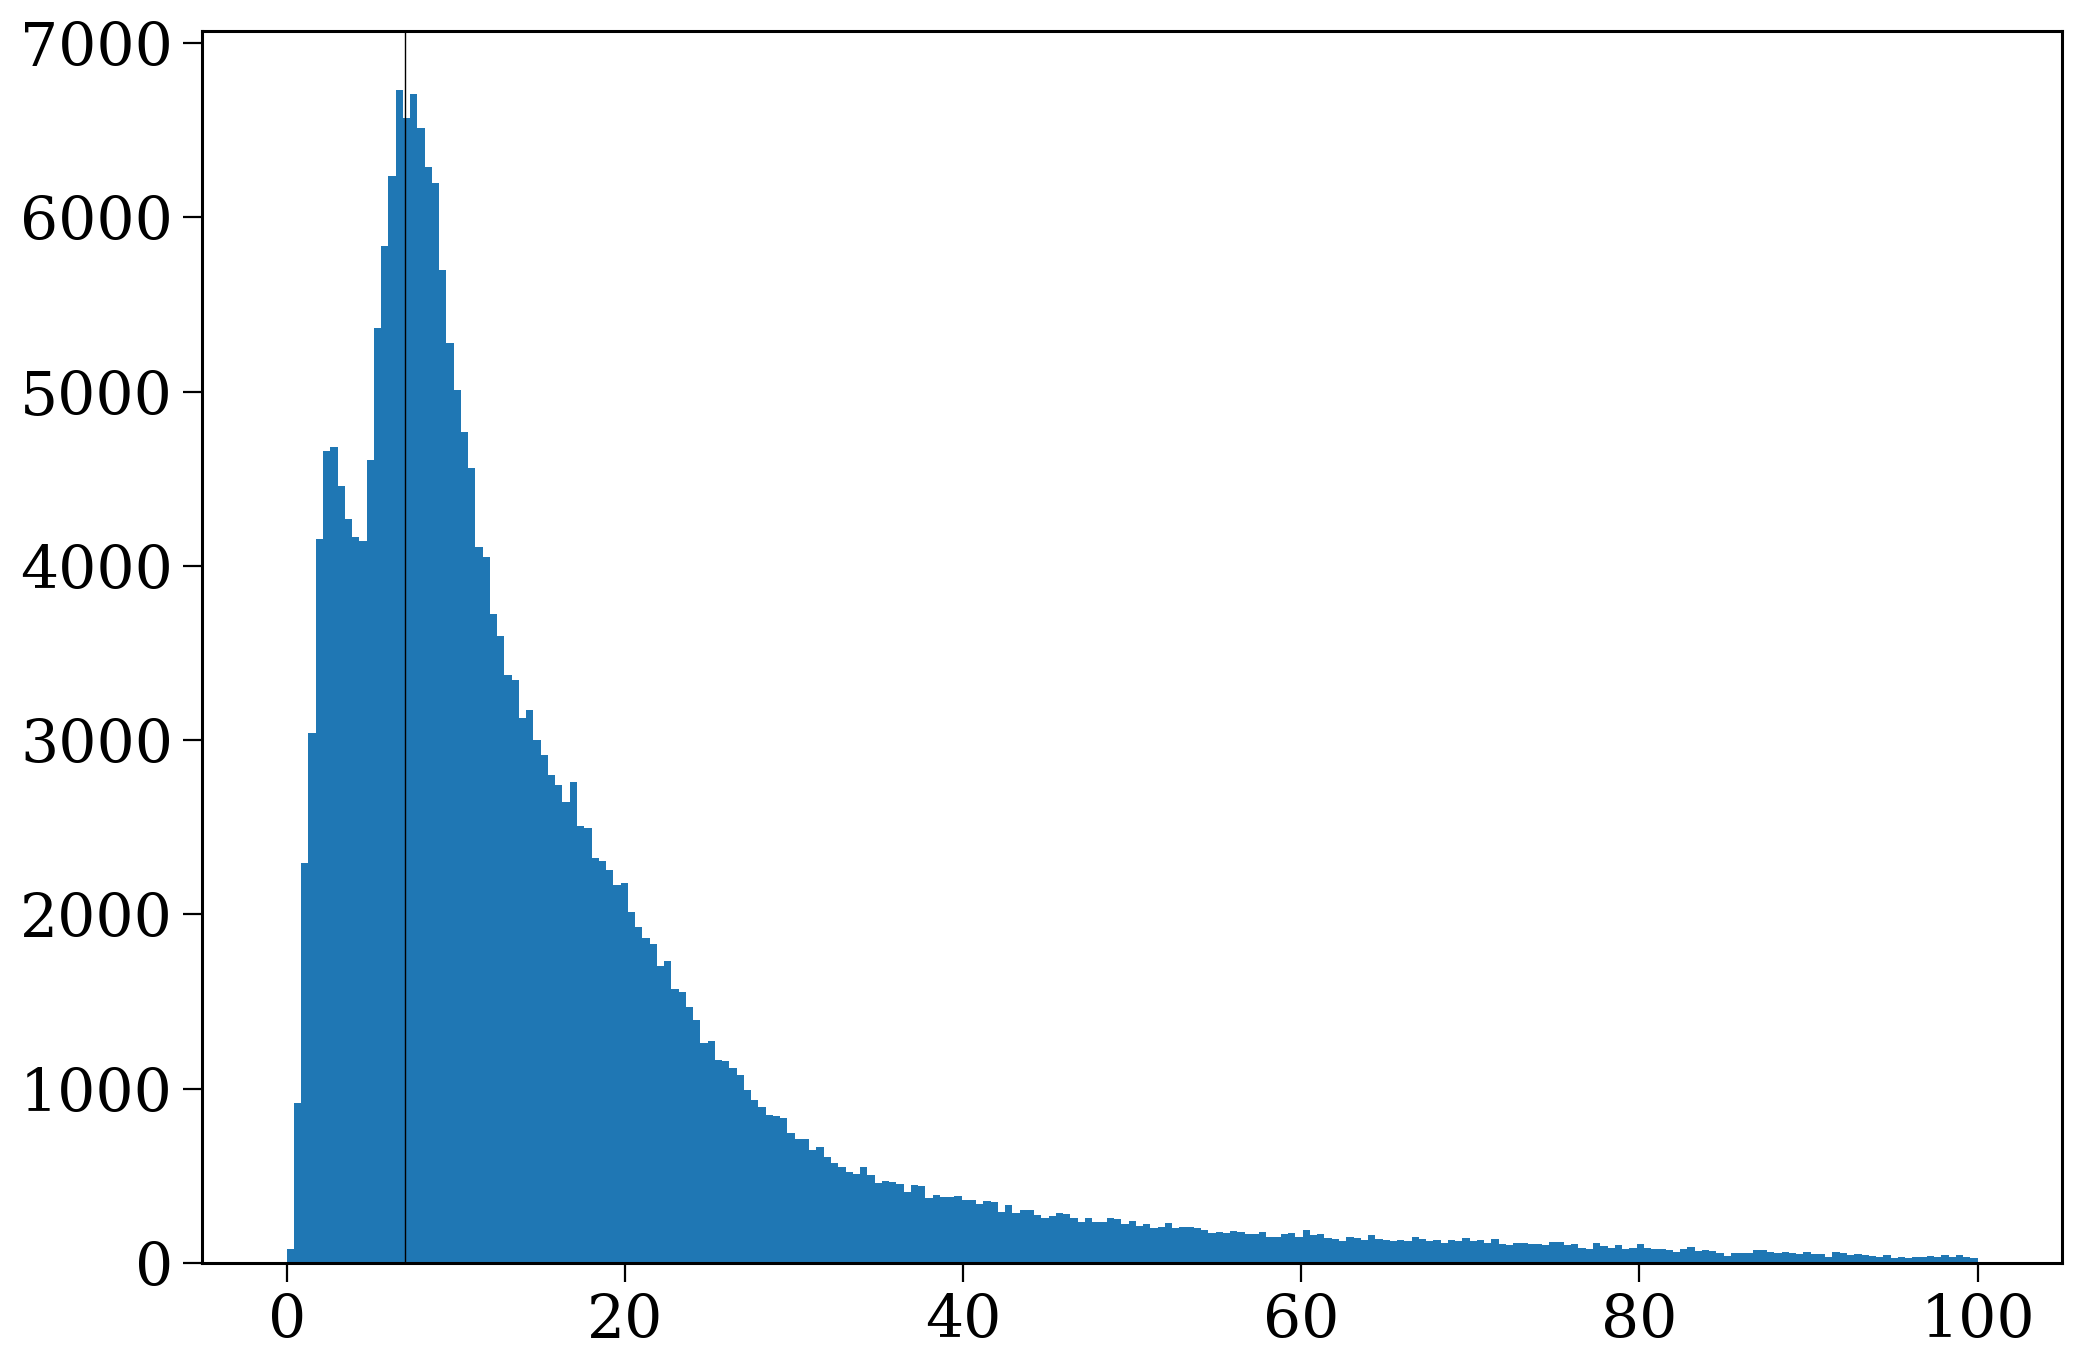

In [27]:
plt.hist(ejection_vels, bins="fd", range=(0, 100));
plt.axvline(7, color="black", lw=0.5)

(0.0, 80.0)

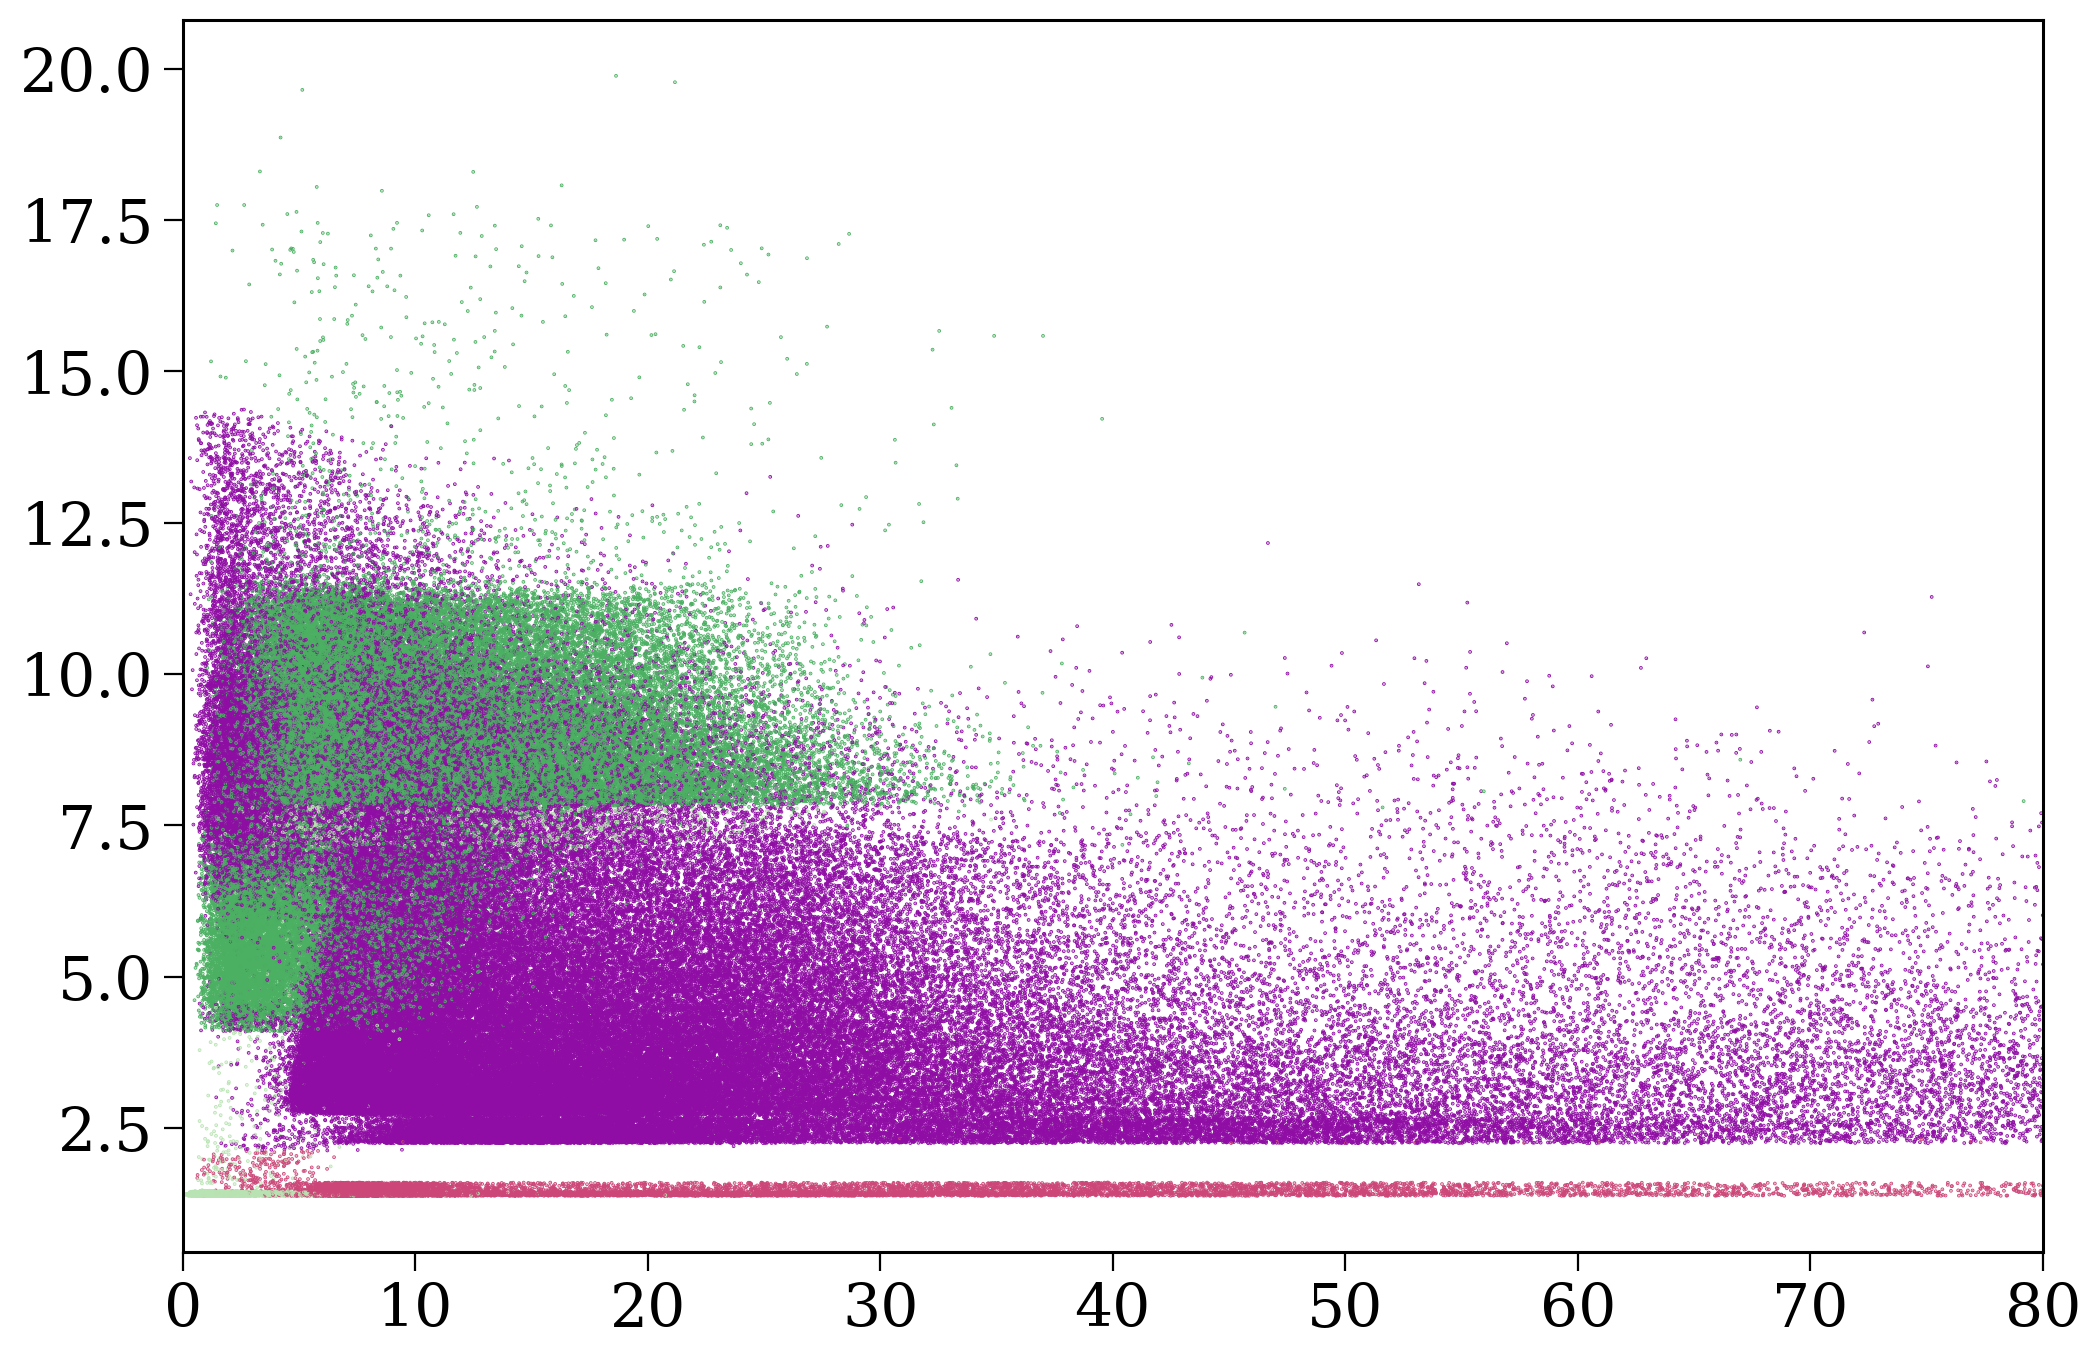

In [25]:
plt.scatter(ejection_vels, ms_ejection_rows["mass_1"], s=.1, c=[cogsworth.utils.kstar_translator[k]["colour"] for k in ms_ejection_rows["kstar_1"].values])
plt.xlim(0, 80)

0.6304718383926304
0.7823544208275689
0.9032184522499292


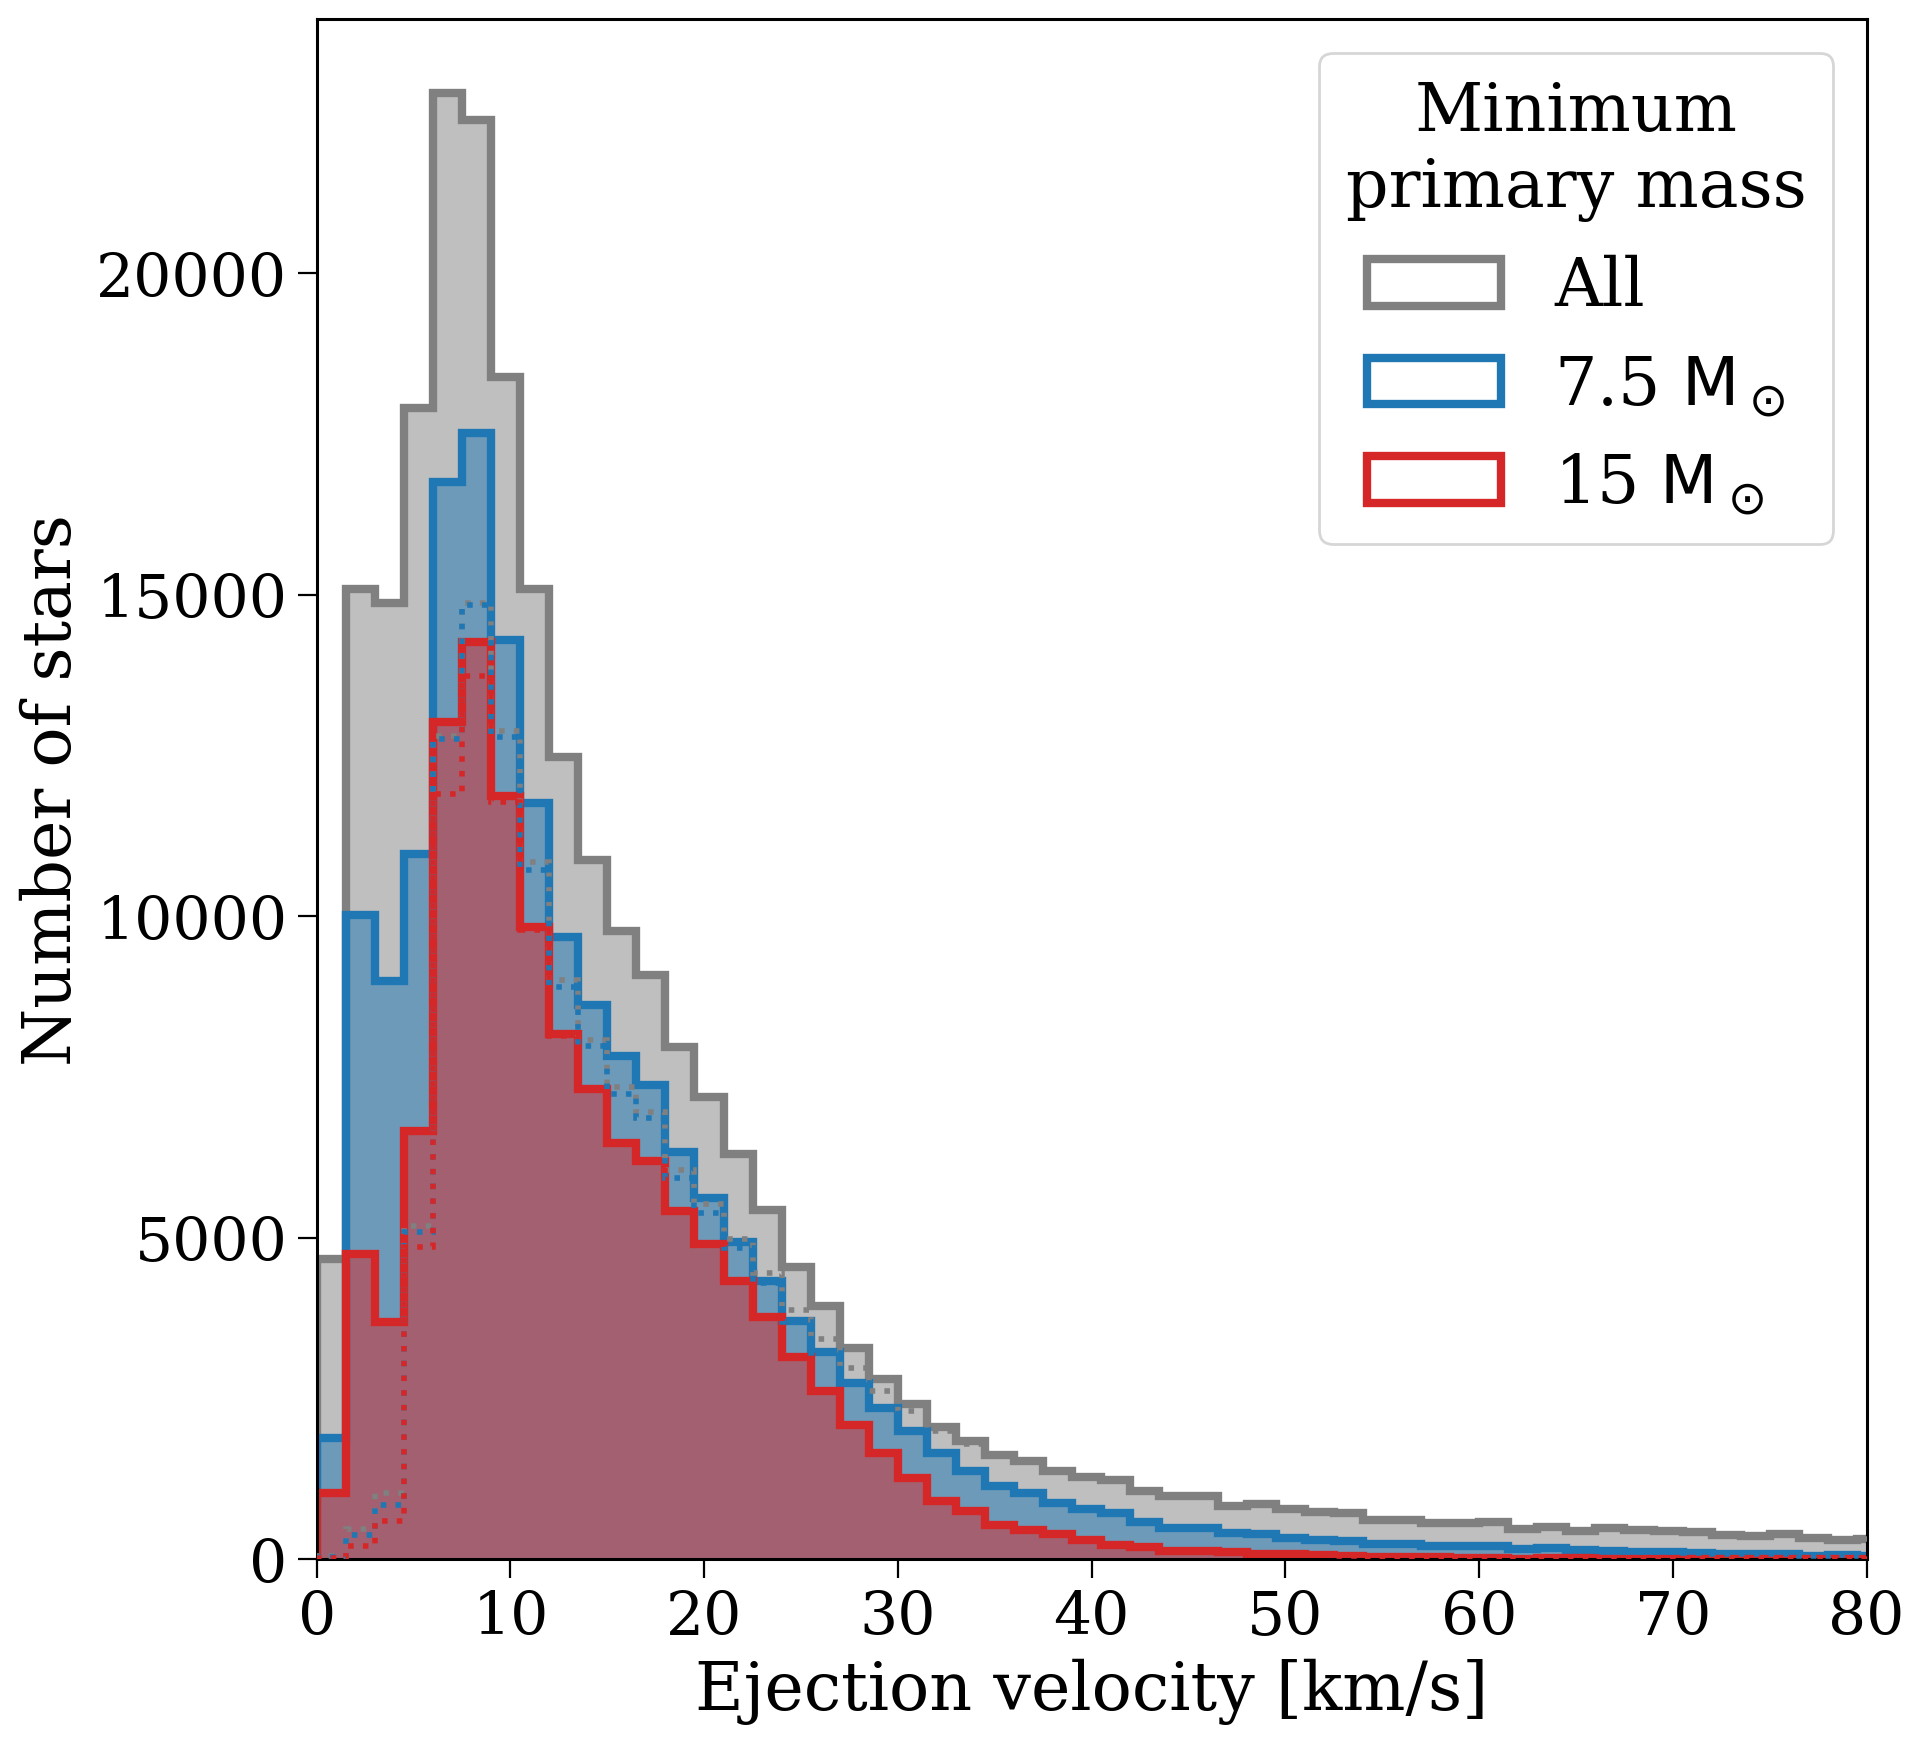

In [24]:
ejection_masses = ms_ejection_rows["mass_2"]
ejection_vels = ms_ejection_kicks["vsys_2_total"]

fig, ax = plt.subplots(figsize=(10, 10))

for lim, c, l in zip([0, 7.5, 15], ["grey", "tab:blue", "tab:red"], ["All", r"7.5 ${\rm M_\odot}$", r"15 ${\rm M_\odot}$"]):
    n = len(ejection_vels[ejection_masses > lim])
    w = n / len(ejection_vels)
    print(((ejection_masses > lim) & ejection_had_mt).sum() / (ejection_masses > lim).sum())
    ax.hist(ejection_vels[ejection_masses > lim], bins=np.arange(0, 81.5, 1.5),
             color=c, histtype="step", lw=3, density=False, label=l)
    ax.hist(ejection_vels[ejection_masses > lim], bins=np.arange(0, 81.5, 1.5),
             color=ColorConverter.to_rgba(c, alpha=0.5), lw=0, density=False)
    ax.hist(ejection_vels[(ejection_masses > lim) & ejection_had_mt], bins=np.arange(0, 81.5, 1.5),
            color=c, lw=2, histtype="step", linestyle="dotted", density=False, zorder=10)

ax.set(xlabel="Ejection velocity [km/s]", ylabel="Number of stars", xlim=(0, 80))
handles, labels = ax.get_legend_handles_labels()

for i in range(len(handles)):
    handles[i].set_facecolor(ColorConverter.to_rgba(handles[i].get_edgecolor(), alpha=0.5))

leg = ax.legend(handles, labels, title="Minimum\nprimary mass", title_fontsize=fs, fontsize=fs)
leg.get_title().set_ha('center')

plt.show()
    
# plt.show()
# x_range = np.geomspace(3e-1, 1e2, 5000)
# plt.plot(x_range, maxwell(scale=10).pdf(x_range) * len(ejection_vels))
# plt.xscale("log")

Polygon110((0, 0) ...)
Polygon110((0, 0) ...)
Polygon110((0, 0) ...)


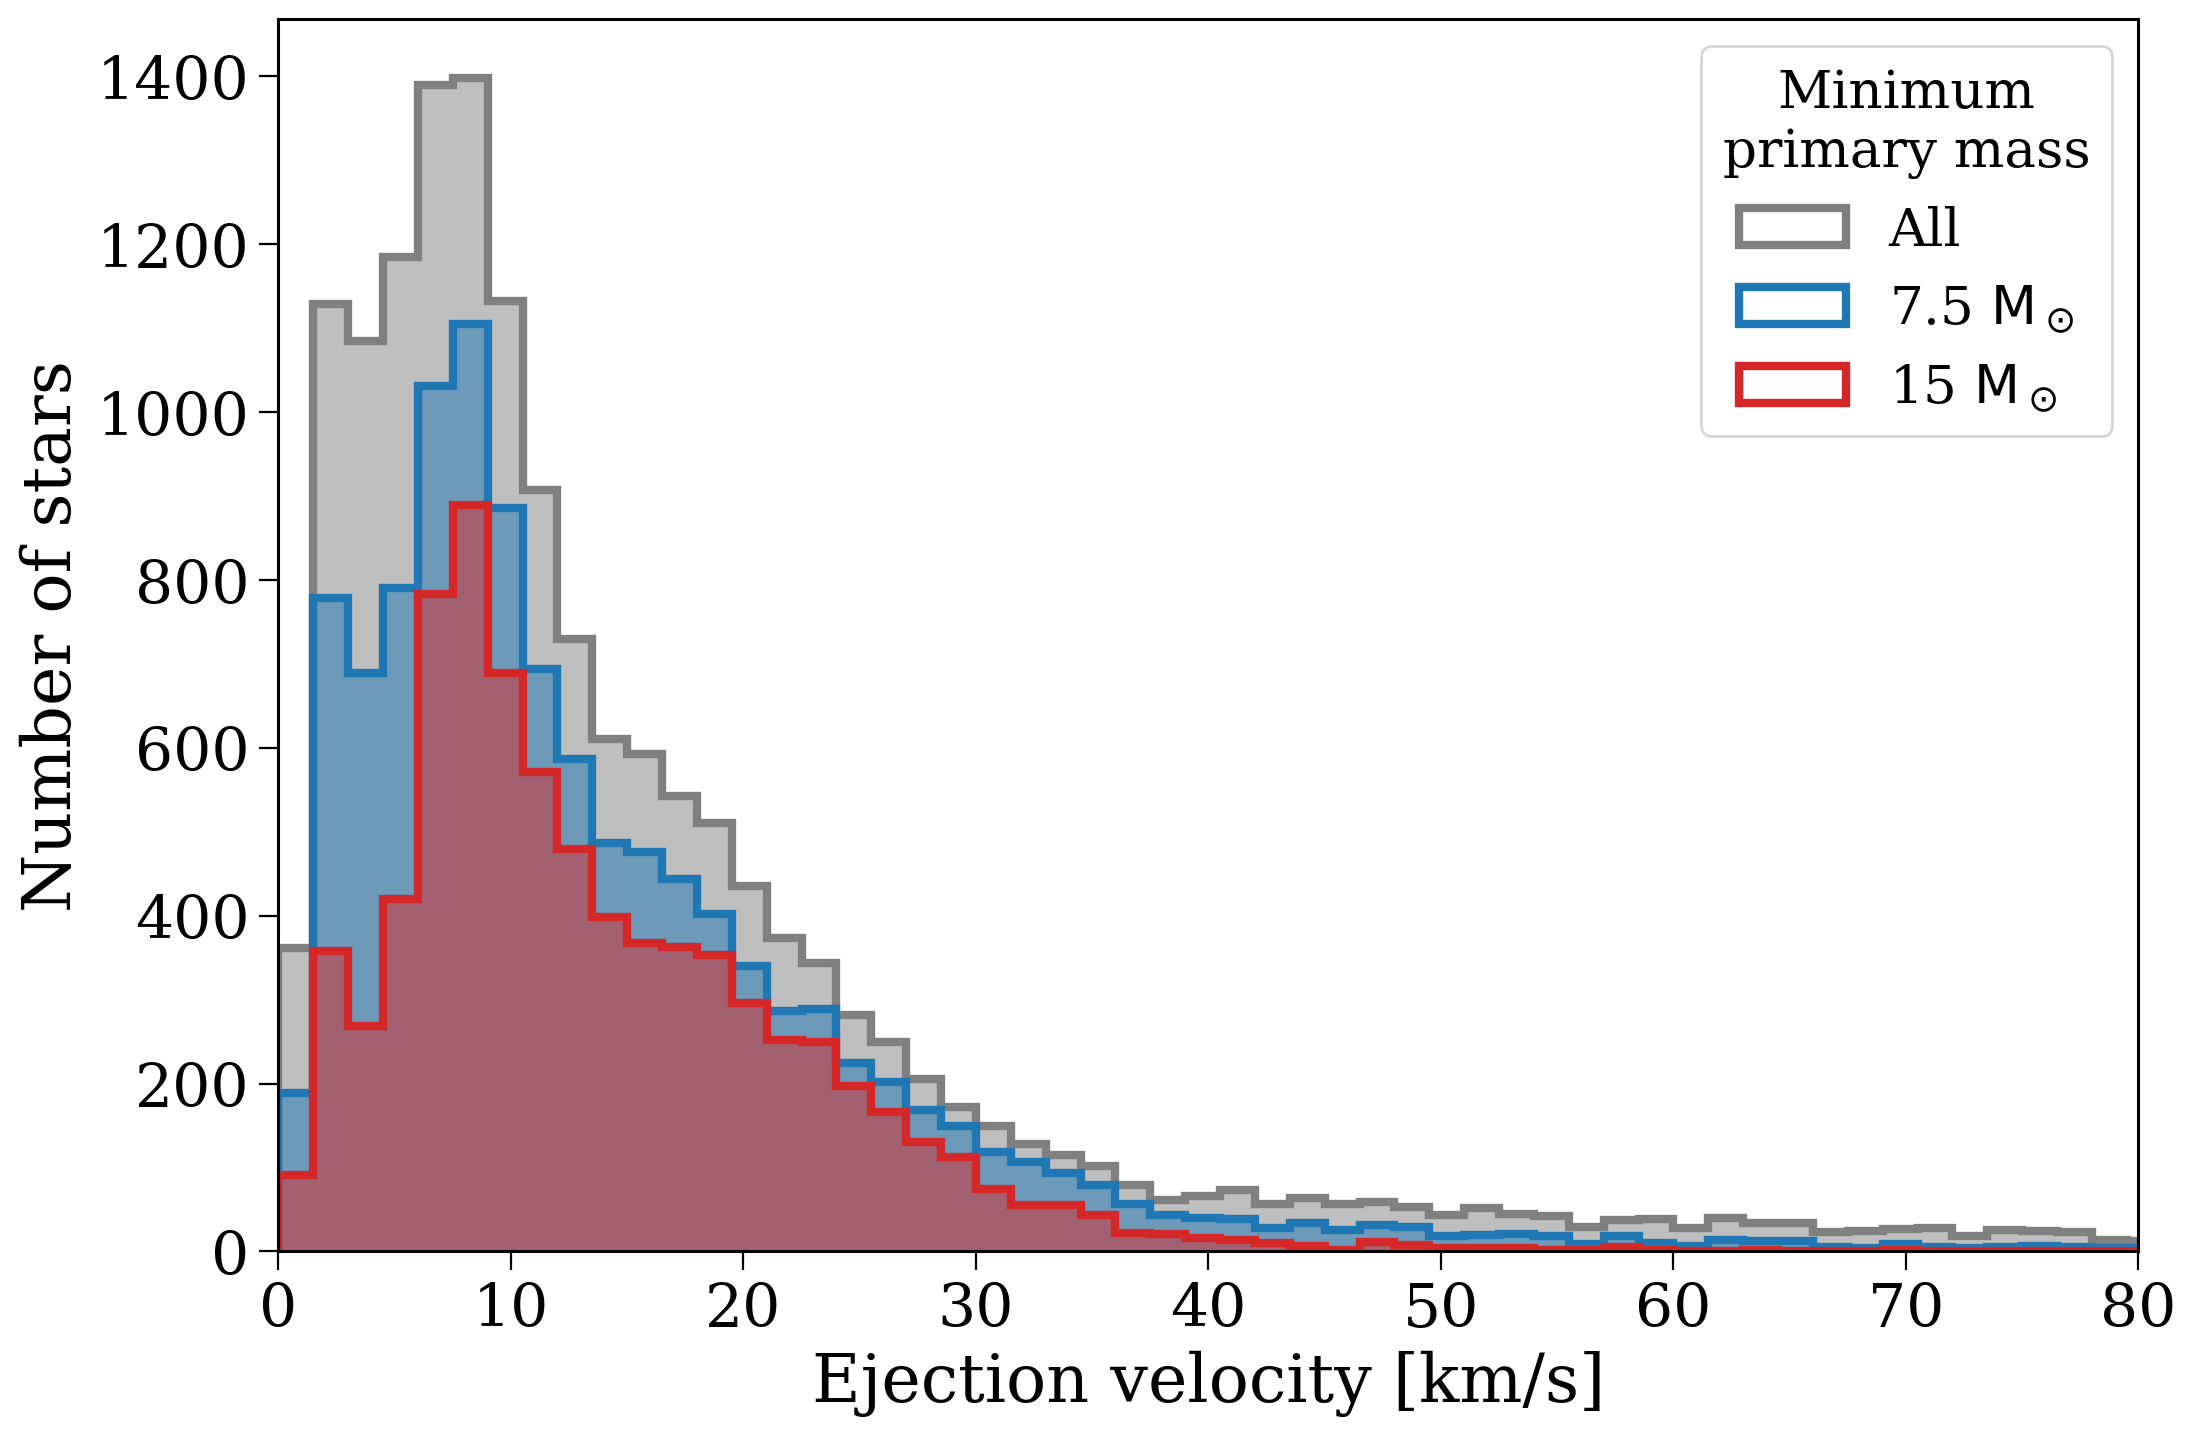

In [42]:
ejection_masses = ms_ejection_rows["mass_2"]
ejection_vels = ms_ejection_kicks["vsys_2_total"]

fig, ax = plt.subplots()

for lim, c, l in zip([0, 7.5, 15], ["grey", "tab:blue", "tab:red"], ["All", r"7.5 ${\rm M_\odot}$", r"15 ${\rm M_\odot}$"]):
    n = len(ejection_vels[ejection_masses > lim])
    w = n / len(ejection_vels)
    ax.hist(ejection_vels[ejection_masses > lim], bins=np.arange(0, 81.5, 1.5),
             color=c, histtype="step", lw=3, density=False, label=l)
    ax.hist(ejection_vels[ejection_masses > lim], bins=np.arange(0, 81.5, 1.5),
             color=ColorConverter.to_rgba(c, alpha=0.5), lw=0, density=False)

ax.set(xlabel="Ejection velocity [km/s]", ylabel="Number of stars", xlim=(0, 80))
handles, labels = ax.get_legend_handles_labels()

for i in range(len(handles)):
    print(handles[i])
    handles[i].set_facecolor(ColorConverter.to_rgba(handles[i].get_edgecolor(), alpha=0.5))

leg = ax.legend(handles, labels, title="Minimum\nprimary mass", title_fontsize=0.8*fs, fontsize=0.8*fs)
leg.get_title().set_ha('center')

plt.show()
    
# plt.show()
# x_range = np.geomspace(3e-1, 1e2, 5000)
# plt.plot(x_range, maxwell(scale=10).pdf(x_range) * len(ejection_vels))
# plt.xscale("log")

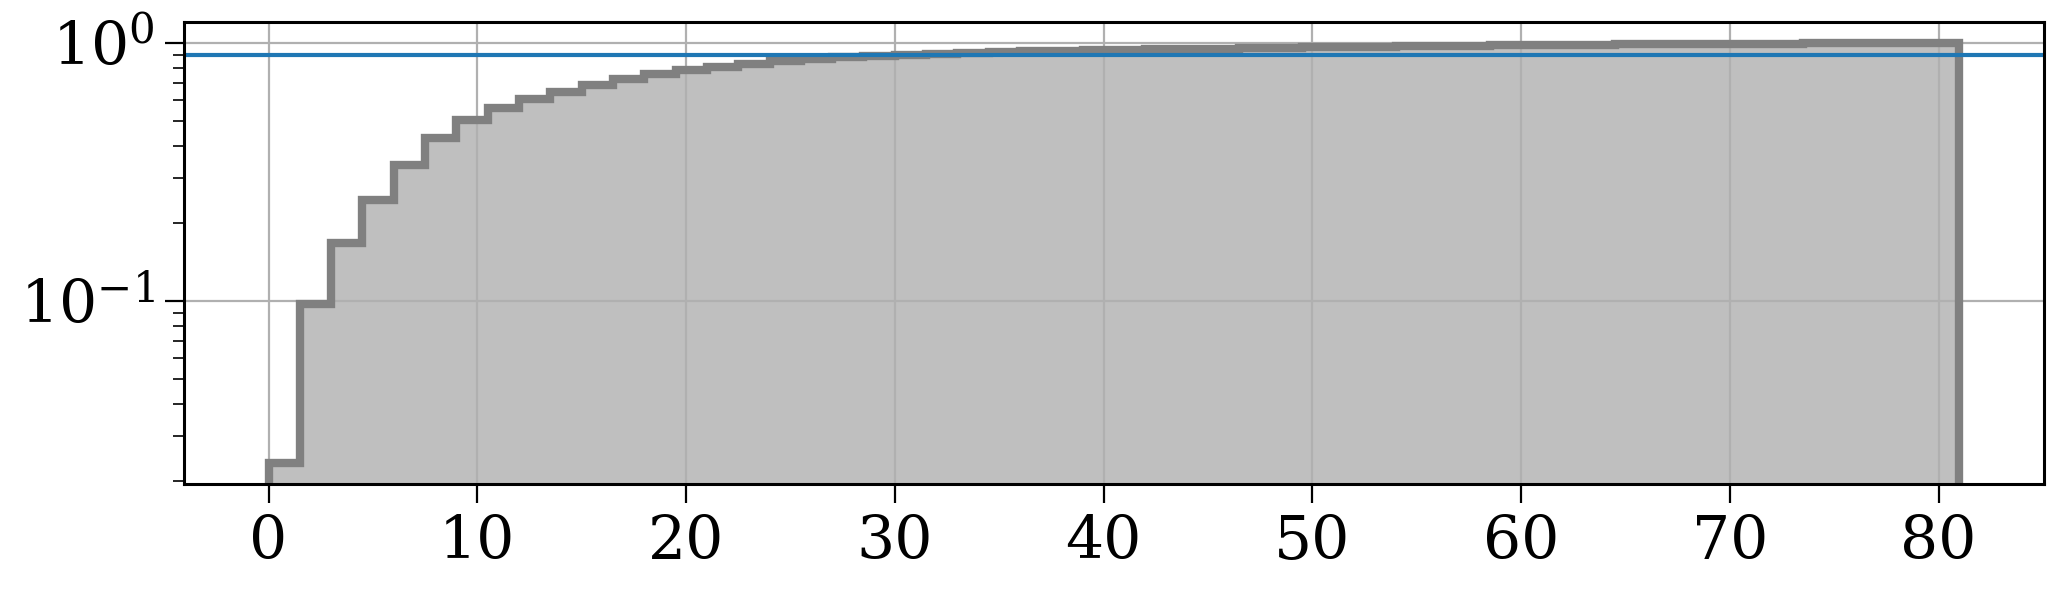

In [540]:
ejection_masses = sn_rows_1["mass_2"].loc[ejection_vels.index]

fig, ax = plt.subplots(figsize=(12, 3))

for lim, c in zip([0], ["grey", "tab:blue", "tab:red"]):
    n = len(ejection_vels[ejection_masses > lim])
    w = n / len(ejection_vels)
    plt.hist(ejection_vels[ejection_masses > lim], bins=np.arange(0, 81.5, 1.5),
             color=c, histtype="step", lw=3, cumulative=True, density=True)
    plt.hist(ejection_vels[ejection_masses > lim], bins=np.arange(0, 81.5, 1.5),
             color=ColorConverter.to_rgba(c, alpha=0.5), lw=0, cumulative=True, density=True)

plt.grid(True)
plt.axhline(0.9)
plt.yscale("log")
# plt.show()
# x_range = np.geomspace(3e-1, 1e2, 5000)
# plt.plot(x_range, maxwell(scale=10).pdf(x_range) * len(ejection_vels))
# plt.xscale("log")